In [365]:
# import libraries

import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import numpy as np

# K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score




In [366]:
df = pd.read_excel('All_data_clean.xlsx')
df.head()

,Invoice,ID_Pelanggan,Nama,Paket_Langganan,Tipe_Service,Biaya_Internet,Biaya_Instalasi,Sewa_Perangkat,Fee_Seller,PPN,Total,Tanggal_Aktif,Metode,Owner_Data,Lama_Berlangganan(Bulan),Area,Bulan_Tahun,Pendapatan_Bersih
0,INV-2772340482,VN25003,Bapak Muhammad Agung Hidayat,SukabumiMonthly20M-Resell,(PRE) PPPOE,105000,0.0,0,95000,22000.0,222000.0,2024-01-18 19:42:00,MEMBER,balisarana,1,Sukabumi,2024-01,105000.0
1,INV-882379310,VN24356,Ferry,BandungMonthly-20M,(PRE) PPPOE,200000,0.0,0,0,22000.0,222000.0,2024-01-30 14:57:00,MEMBER,mixradius,1,Bandung,2024-01,200000.0
2,INV-1492311256,VN25218,Mr. Aris Komarudin,BandungMonthly-20M,(PRE) PPPOE,200000,0.0,0,0,22000.0,222000.0,2024-02-09 13:31:00,MEMBER,mixradius,1,Bandung,2024-02,200000.0
3,INV-21102395904,VN23239,PT HGT Services Indonesia,GLC-Ruko-150M,(PRE) PPPOE,2200000,0.0,0,0,242000.0,2442000.0,2024-03-08 14:16:00,MEMBER,mixradius,8,Jakarta,2024-03,2200000.0
4,INV-14112352090,VN25916,Mr. Budi Rahayu,BandungMonthly-30M,(PRE) PPPOE,260000,0.0,0,0,28600.0,288600.0,2024-02-01 20:04:00,MEMBER,mixradius,1,Bandung,2024-02,260000.0


In [367]:
df.shape

(14070, 18)

In [368]:
# basics of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14070 entries, 0 to 14069
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Invoice                   14070 non-null  object        
 1   ID_Pelanggan              14070 non-null  object        
 2   Nama                      14070 non-null  object        
 3   Paket_Langganan           14070 non-null  object        
 4   Tipe_Service              14070 non-null  object        
 5   Biaya_Internet            14070 non-null  int64         
 6   Biaya_Instalasi           14070 non-null  float64       
 7   Sewa_Perangkat            14070 non-null  int64         
 8   Fee_Seller                14070 non-null  int64         
 9   PPN                       14070 non-null  float64       
 10  Total                     14070 non-null  float64       
 11  Tanggal_Aktif             14070 non-null  datetime64[ns]
 12  Metode            

## **Calculating RFM metrics**

In [369]:
df.head()

,Invoice,ID_Pelanggan,Nama,Paket_Langganan,Tipe_Service,Biaya_Internet,Biaya_Instalasi,Sewa_Perangkat,Fee_Seller,PPN,Total,Tanggal_Aktif,Metode,Owner_Data,Lama_Berlangganan(Bulan),Area,Bulan_Tahun,Pendapatan_Bersih
0,INV-2772340482,VN25003,Bapak Muhammad Agung Hidayat,SukabumiMonthly20M-Resell,(PRE) PPPOE,105000,0.0,0,95000,22000.0,222000.0,2024-01-18 19:42:00,MEMBER,balisarana,1,Sukabumi,2024-01,105000.0
1,INV-882379310,VN24356,Ferry,BandungMonthly-20M,(PRE) PPPOE,200000,0.0,0,0,22000.0,222000.0,2024-01-30 14:57:00,MEMBER,mixradius,1,Bandung,2024-01,200000.0
2,INV-1492311256,VN25218,Mr. Aris Komarudin,BandungMonthly-20M,(PRE) PPPOE,200000,0.0,0,0,22000.0,222000.0,2024-02-09 13:31:00,MEMBER,mixradius,1,Bandung,2024-02,200000.0
3,INV-21102395904,VN23239,PT HGT Services Indonesia,GLC-Ruko-150M,(PRE) PPPOE,2200000,0.0,0,0,242000.0,2442000.0,2024-03-08 14:16:00,MEMBER,mixradius,8,Jakarta,2024-03,2200000.0
4,INV-14112352090,VN25916,Mr. Budi Rahayu,BandungMonthly-30M,(PRE) PPPOE,260000,0.0,0,0,28600.0,288600.0,2024-02-01 20:04:00,MEMBER,mixradius,1,Bandung,2024-02,260000.0


**Monetary -** Total or average amount spent by the customer.


In [370]:
# Calculating Monetary attribute
cus_data = df.groupby('ID_Pelanggan')[['Total']].sum() # Total amount spent
cus_data.rename(columns={'Total':'Monetary'},inplace=True)
cus_data.head()

,Monetary
ID_Pelanggan,
0,6065000.0
23122202720,888000.0
VN21035,7492500.0
VN21036,9990000.0
VN21045,2752800.0


**Frequency -** Total number of transactions made by customer or average time between transactions.

In [371]:
# Calculating frequency attribute
cus_data['Frequency'] = df.groupby('ID_Pelanggan')['Invoice'].count()
cus_data.head()

,Monetary,Frequency
ID_Pelanggan,,
0,6065000.0,44
23122202720,888000.0,5
VN21035,7492500.0,9
VN21036,9990000.0,9
VN21045,2752800.0,4


**Recency -** Time since last order or engaged with product.

In [372]:
max_date = max(df['Tanggal_Aktif'])
max_date

Timestamp('2024-09-25 08:49:00')

In [373]:
df['diff'] = max_date - df['Tanggal_Aktif']
df.head()

,Invoice,ID_Pelanggan,Nama,Paket_Langganan,Tipe_Service,Biaya_Internet,Biaya_Instalasi,Sewa_Perangkat,Fee_Seller,PPN,Total,Tanggal_Aktif,Metode,Owner_Data,Lama_Berlangganan(Bulan),Area,Bulan_Tahun,Pendapatan_Bersih,diff
0,INV-2772340482,VN25003,Bapak Muhammad Agung Hidayat,SukabumiMonthly20M-Resell,(PRE) PPPOE,105000,0.0,0,95000,22000.0,222000.0,2024-01-18 19:42:00,MEMBER,balisarana,1,Sukabumi,2024-01,105000.0,250 days 13:07:00
1,INV-882379310,VN24356,Ferry,BandungMonthly-20M,(PRE) PPPOE,200000,0.0,0,0,22000.0,222000.0,2024-01-30 14:57:00,MEMBER,mixradius,1,Bandung,2024-01,200000.0,238 days 17:52:00
2,INV-1492311256,VN25218,Mr. Aris Komarudin,BandungMonthly-20M,(PRE) PPPOE,200000,0.0,0,0,22000.0,222000.0,2024-02-09 13:31:00,MEMBER,mixradius,1,Bandung,2024-02,200000.0,228 days 19:18:00
3,INV-21102395904,VN23239,PT HGT Services Indonesia,GLC-Ruko-150M,(PRE) PPPOE,2200000,0.0,0,0,242000.0,2442000.0,2024-03-08 14:16:00,MEMBER,mixradius,8,Jakarta,2024-03,2200000.0,200 days 18:33:00
4,INV-14112352090,VN25916,Mr. Budi Rahayu,BandungMonthly-30M,(PRE) PPPOE,260000,0.0,0,0,28600.0,288600.0,2024-02-01 20:04:00,MEMBER,mixradius,1,Bandung,2024-02,260000.0,236 days 12:45:00


In [374]:
import datetime as dt

cus_data['Recency'] = df.groupby('ID_Pelanggan')['diff'].min().dt.days
cus_data = cus_data.reset_index()
cus_data.head()

,ID_Pelanggan,Monetary,Frequency,Recency
0,0,6065000.0,44,5
1,23122202720,888000.0,5,29
2,VN21035,7492500.0,9,18
3,VN21036,9990000.0,9,16
4,VN21045,2752800.0,4,164


## **Treating Outliers**

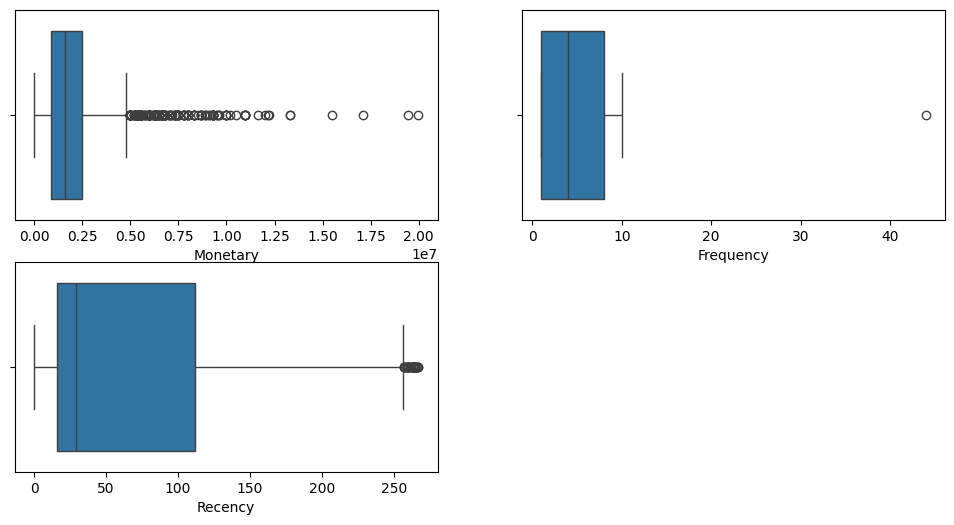

In [375]:
num_features = cus_data.columns[1:]
r = c = 0
fig,ax = plt.subplots(2,2,figsize=(12,6))

for n,i in enumerate(num_features):
    sns.boxplot(x=i, data=cus_data,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

Based on the above box plots, it's visible that Monetary and Recency attributes have outliers. Since clustering algorithms like K-means are susceptible to outliers we will be treating them by capping them at 95% quantile.

In [376]:
h_cap = 0.95
h_cap_val = cus_data['Monetary'].quantile(h_cap)
cus_data['Monetary'][cus_data['Monetary'] > h_cap_val] = h_cap_val
l_cap = 0.05
l_cap_val = cus_data['Monetary'].quantile(l_cap)
cus_data['Monetary'][cus_data['Monetary'] < l_cap_val] = l_cap_val

C:\Users\faisa\AppData\Local\Temp\ipykernel_4496\442679840.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cus_data['Monetary'][cus_data['Monetary'] > h_cap_val] = h_cap_val
C:\Users\faisa\AppData\Local\Temp\ipykernel_4496\442679840.py:3

In [377]:
cap = 0.95
cap_val = cus_data['Recency'].quantile(cap)
cus_data['Recency'][cus_data['Recency'] > cap_val] = cap_val

C:\Users\faisa\AppData\Local\Temp\ipykernel_4496\471171065.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cus_data['Recency'][cus_data['Recency'] > cap_val] = cap_val
C:\Users\faisa\AppData\Local\Temp\ipykernel_4496\471171065.py:3: Sett

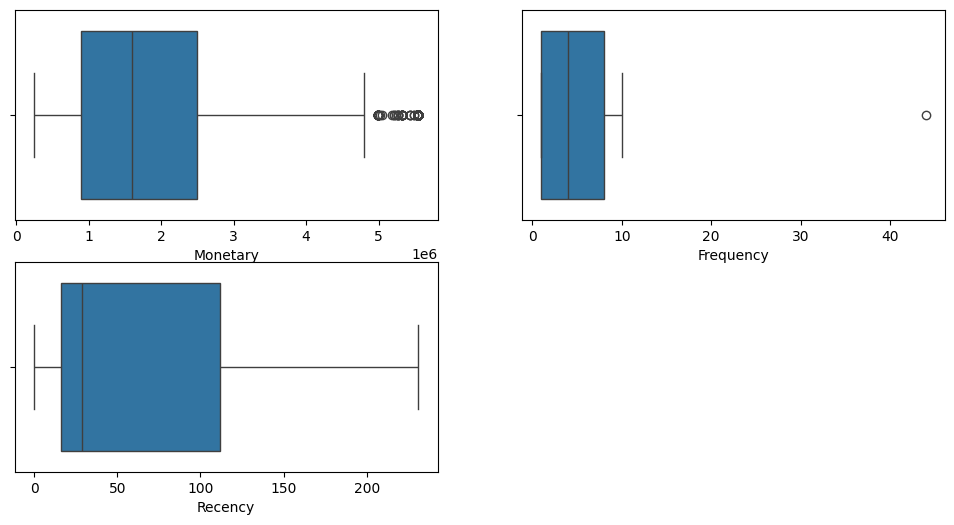

In [378]:
num_features = cus_data.columns[1:]
r = c = 0
fig,ax = plt.subplots(2,2,figsize=(12,6))

for n,i in enumerate(num_features):
    sns.boxplot(x=i, data=cus_data,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

## **Creating pipeline for feature scaling & dimensionality reduction**

Normalisasi

In [379]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler()),
            ("pca", PCA(n_components=2, random_state=42)),
        ]
    )

In [380]:
X = cus_data.drop('ID_Pelanggan',axis=1)
X_scaled = pd.DataFrame(preprocessor.fit_transform(X),columns=['PC_1','PC_2'])

## **Hopkins Test**

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [381]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [382]:
for i in range(5):
  print('Hopkins statistic value is:',round(hopkins(X_scaled),3))

Hopkins statistic value is: 0.848
Hopkins statistic value is: 0.867
Hopkins statistic value is: 0.862
Hopkins statistic value is: 0.86
Hopkins statistic value is: 0.883


Since the Hopkins test value hovers around 0.85, therefore given data have high clustering tendency.

# **Cluster assignment using K-means clustering**

## **a) Finding Optimal value of K (Clusters)**

- Elbow Method
- Silhouette Analysis

### **Elbow method**

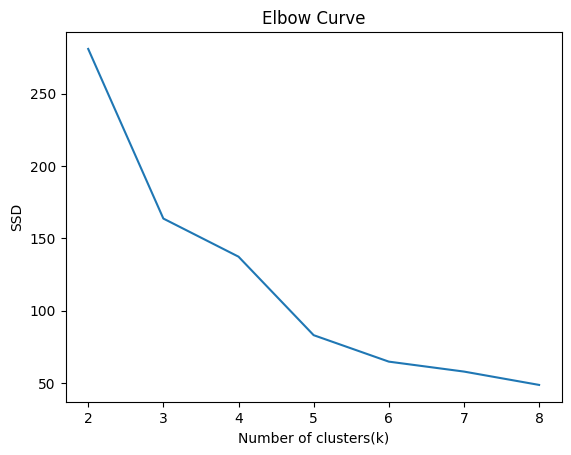

In [383]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters,ssd)
plt.xlabel('Number of clusters(k)')
plt.ylabel('SSD')
plt.title('Elbow Curve')
plt.show()

Based on above "elbow" curve, k=3 seems to be the optimal number of clusters.

### **Silhouette Analysis**

In [384]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, round(silhouette_avg,2)))

For n_clusters=2, the silhouette score is 0.52
For n_clusters=3, the silhouette score is 0.55
For n_clusters=4, the silhouette score is 0.55
For n_clusters=5, the silhouette score is 0.5
For n_clusters=6, the silhouette score is 0.43
For n_clusters=7, the silhouette score is 0.45
For n_clusters=8, the silhouette score is 0.45


Using silhouette analysis k=3 seems to be the optimal number of clusters.

## **b) Run K-means using optimal K**

In [385]:
# final model with k=3
kmeans = KMeans(n_clusters=3, init='k-means++' ,max_iter=50,random_state=1)
kmeans.fit(X_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=1)

In [386]:
# Adding cluster labels to master dataframe
X_scaled['cluster_id'] = kmeans.labels_
X['cluster_id'] = kmeans.labels_

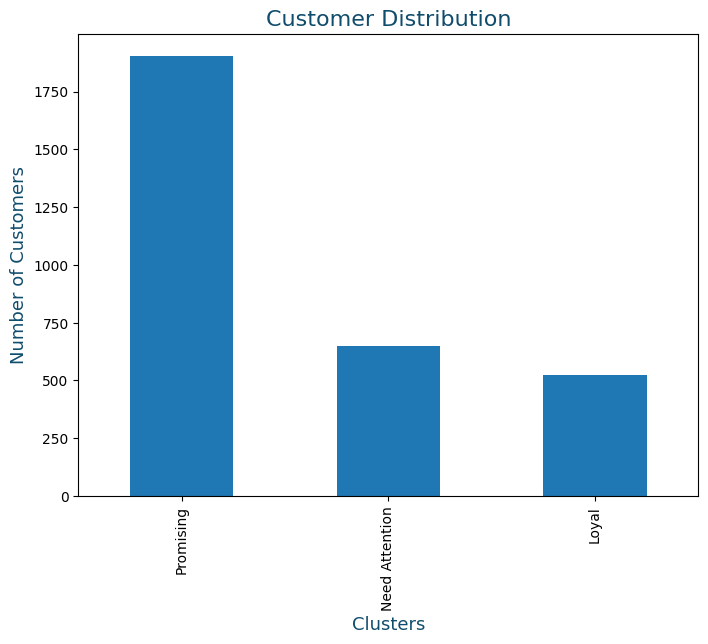

In [387]:
# Number of customers per cluster

cluster_mapping = {0}

font_title = {
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 16,
        }


font_label = {
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 13,
        }
plt.figure(figsize=(8,6))
ax = X_scaled['cluster_id'].value_counts().plot(kind='bar')
ax.set_xticklabels(['Promising','Need Attention','Loyal'])
ax.set_ylabel('Number of Customers',font_label)
ax.set_xlabel('Clusters',font_label)
ax.set_title("Customer Distribution",font_title)
plt.show()

## **c) Clustering profiling using R-F-M**

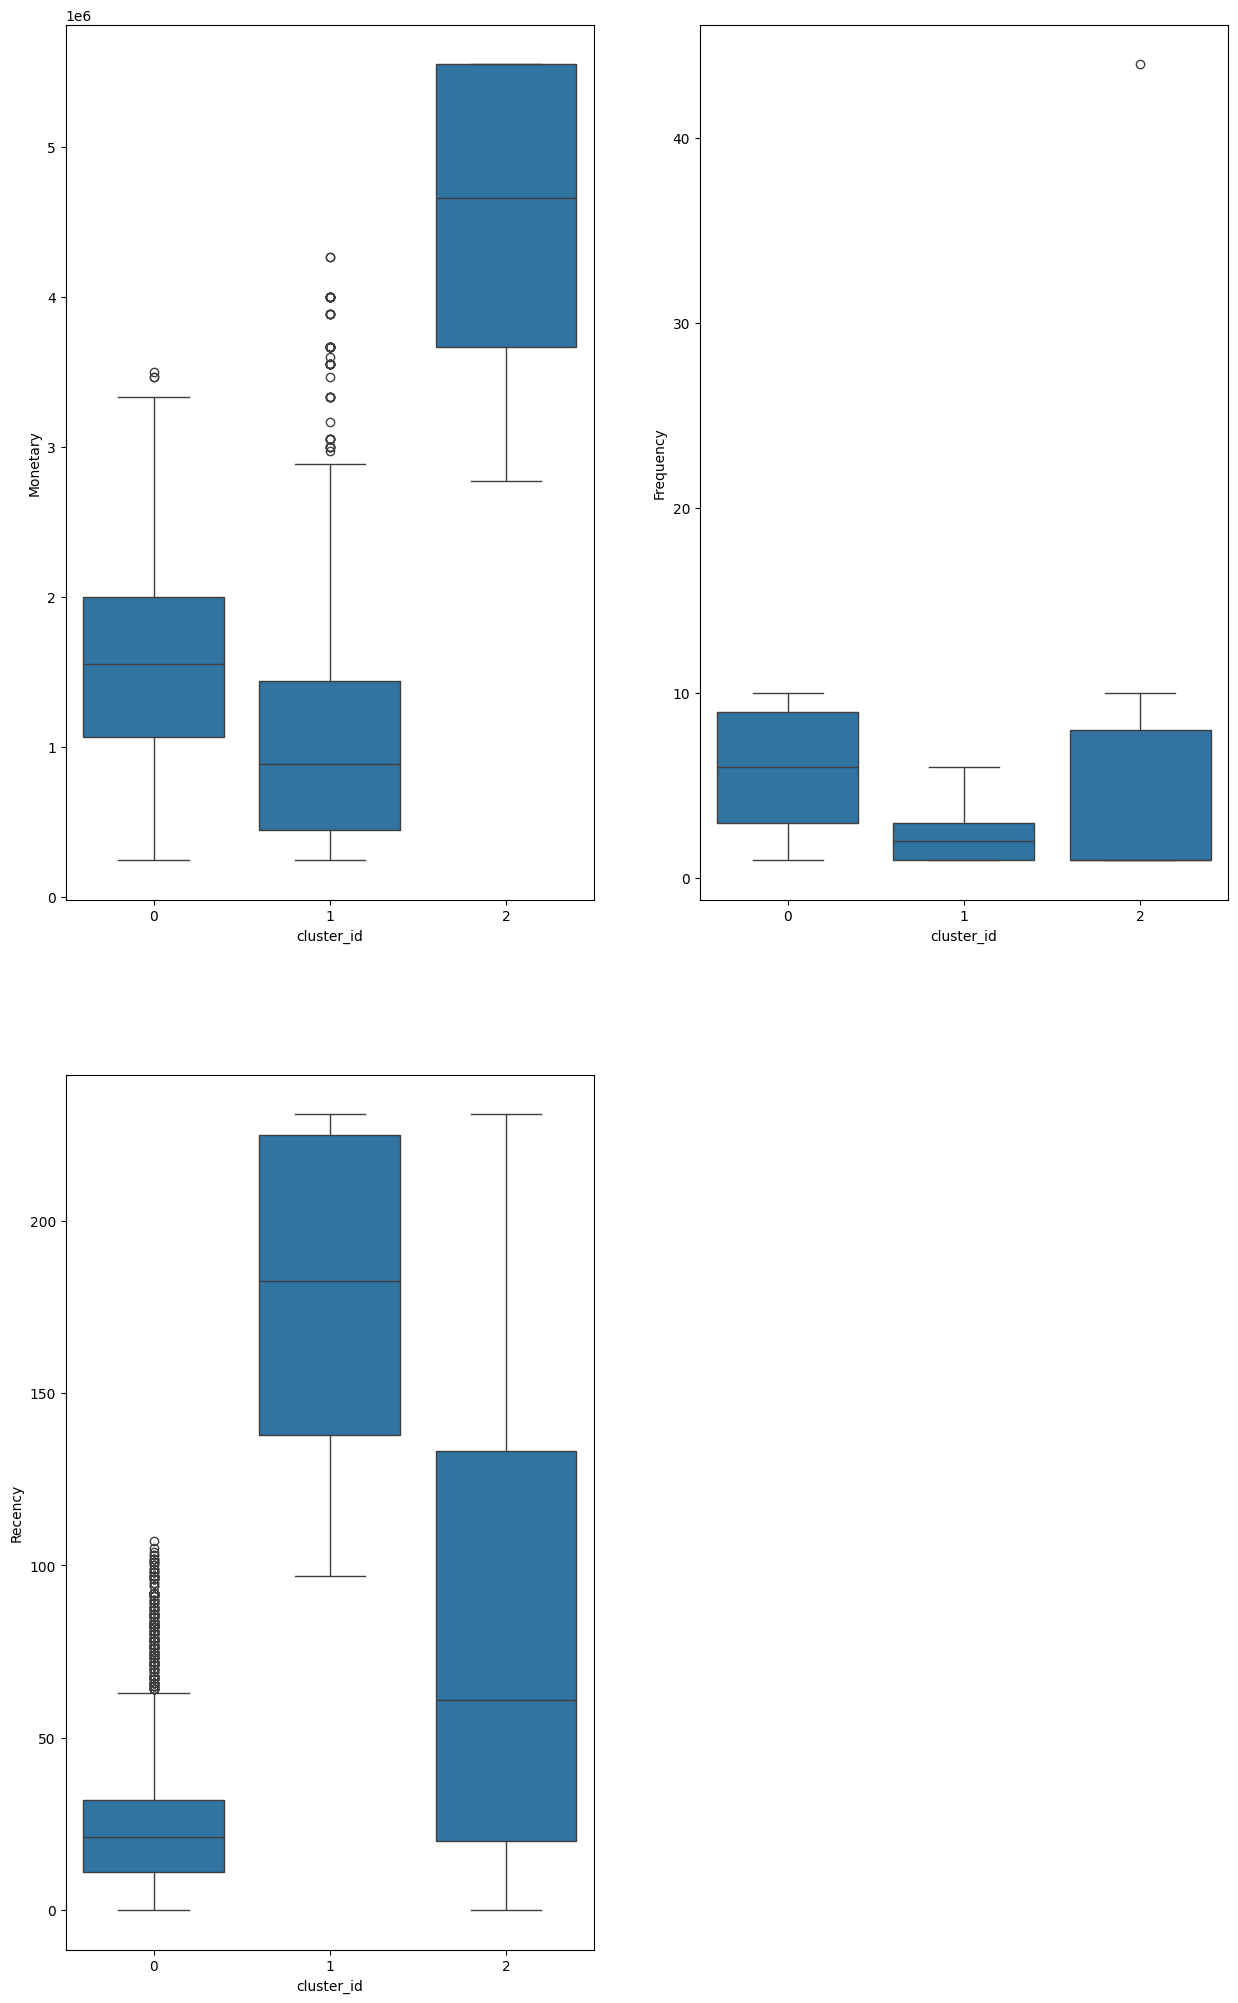

In [388]:
# Visualizing Numerical columns using Boxplots
cols = X.columns[0:-1].tolist()
r = c = 0
fig,ax = plt.subplots(2,2,figsize=(15,25))

for n,i in enumerate(cols):
    sns.boxplot(x='cluster_id',y=cols[n], data=X,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

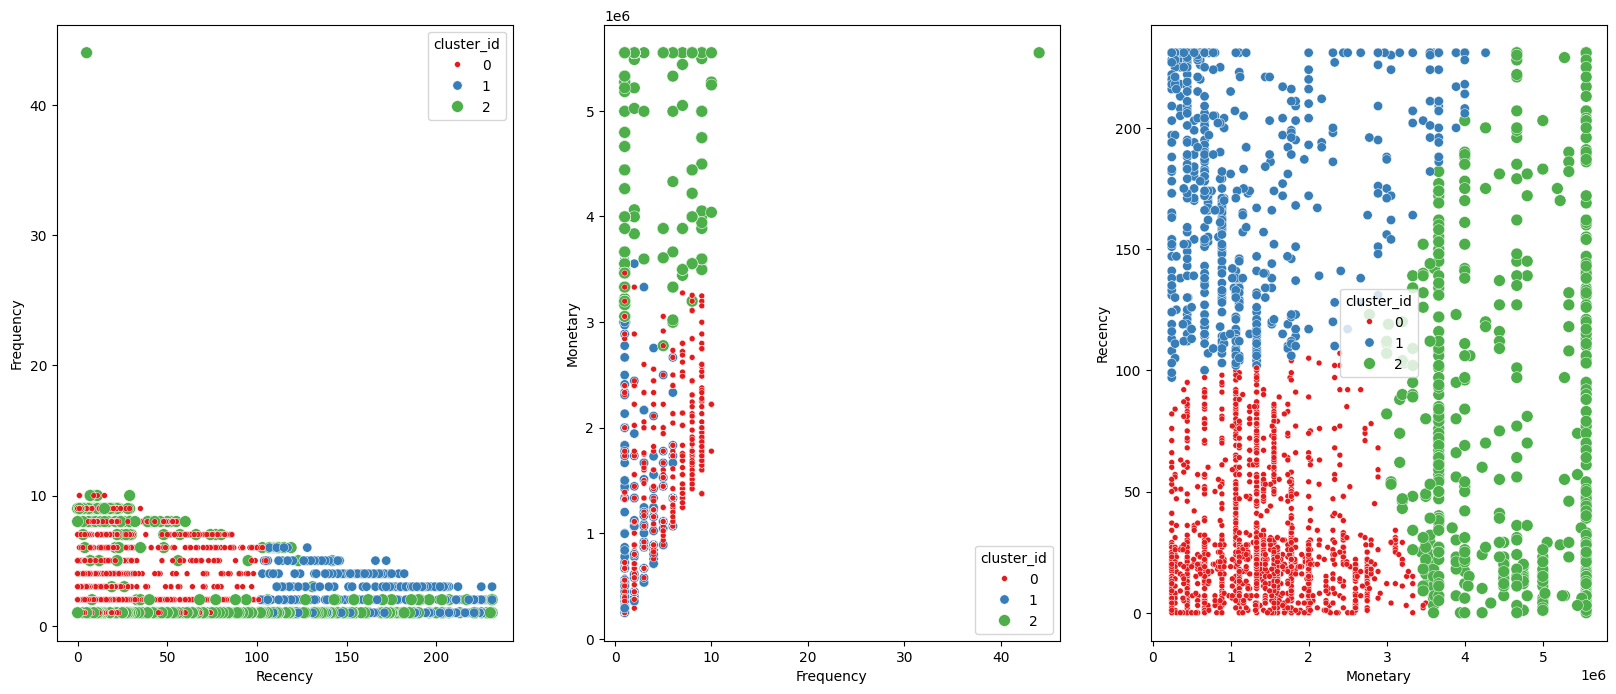

In [389]:
fig = plt.figure(figsize=[20,8])

plt.subplot(1,3,1)
sns.scatterplot(data=X,x="Recency",y="Frequency",hue="cluster_id",size="cluster_id",palette="Set1")
plt.subplot(1,3,2)
sns.scatterplot(data=X,x="Frequency",y="Monetary",hue="cluster_id",size="cluster_id",palette="Set1")
plt.subplot(1,3,3)
sns.scatterplot(data=X,x="Monetary",y="Recency",hue="cluster_id",size="cluster_id",palette="Set1")
plt.show()

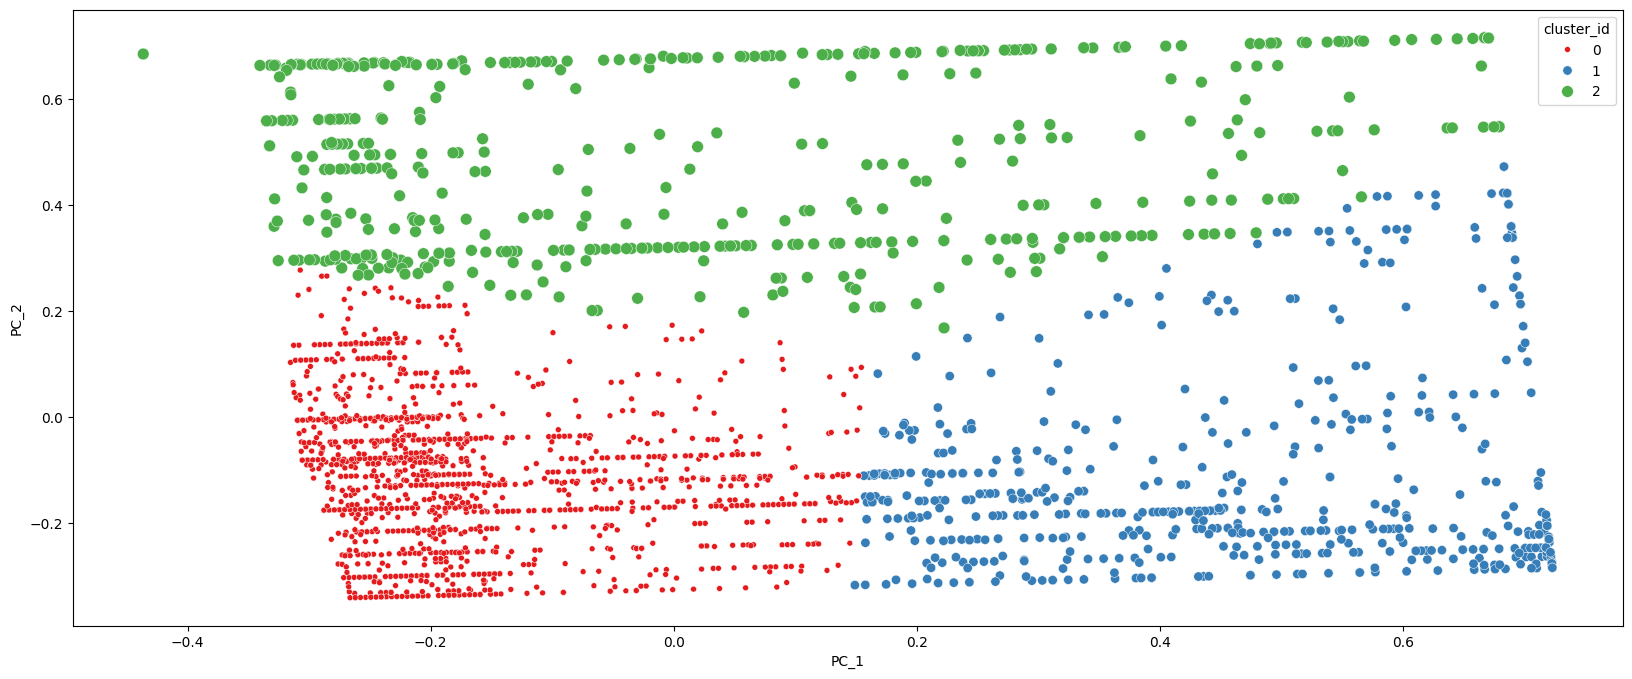

In [390]:
# Vusializing clusters using Principle Components
fig = plt.figure(figsize=[20,8])

sns.scatterplot(data=X_scaled,x="PC_1",y="PC_2",hue="cluster_id",size="cluster_id",palette="Set1")
plt.show()